###### 03 Geometric Machine Learning for Shape Analysis

## A) Classification on Manifolds and Shape Spaces

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE


<center><img src="figs/03_frechetmean.png" width=250px alt="default"/></center>

# This Unit

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
- **Unit 2 (Shapes)**: Computational Representations of Biomedical Shapes
- **Unit 3 (Machine Learning)**: **Geometric Machine Learning for Shape Analysis**
  - A) Mean and Covariance
  - **B) Supervised Learning: Classification**
    - Motivation: Classification of Schizophrenia
    - Tangent Machine Learning: Tangent Classifications
    - Metric Machine Learning: Minimum distance to mean
  - C) Supervised Learning: Regression
  - D) Unsupervised Learning: Clustering
  - E) Unsupervised Learning: Dimension Reduction
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

$\rightarrow$ We explain the machine learning algorithms and statistics used in these real-world scenarios.

<center><img src="figs/00_bioshape.jpg" width=350px alt="default"/></center>


# Overview of Machine Learning (ML)

Machine Learning is divided into two principal categories of algorithms: supervised and unsupervised learning algorithms. Both learn from data.

$\color{#EF5645}{\text{Definition}}$: Supervised learning refers to the task of learning a function that maps an input $x$ to an output $y$ based on example input-output pairs. We say that the model is:
- a classification if the outputs are categorical,
- a regression if the outputs are quantitative.

$\color{#047C91}{\text{Exercise}}$: Regression or Classification?
- Learning a function that takes a cancer cell shape as input and outputs the type of drug that has been given to this cell.
- Learning a function that takes a brain shape as input and outputs the age of the subject.

# Recall: Classification

Goal: Given X, predict y (categorical).

Do this in two phases:
- Training time
- Testing / Prediction time

# Motivation: Classification of Schizophrenia

https://docs.google.com/presentation/d/19jSZkBc6VapBvM4e8mdkJmvwLI45h1lr_qF-ICWnG-c/edit#slide=id.g5f5b9a4556_0_294
    
    
https://docs.google.com/presentation/d/1bytt22z6IiBtMNER_ECRe2vN9UiLk0Xn_Vh0fcwopug/edit#slide=id.g5f813788fb_0_79


https://docs.google.com/presentation/d/1owh_z33vBAay5eGHEtjotU33FmY17b6qOi3cOcjYuG0/edit#slide=id.g5f813788fb_0_85

## Brain Shapes: White Matter

White matter is referd to as the "highway of the brain", it transports the information.

$\color{#EF5645}{\text{What is White Matter}}$: 
- White matter makes up the bulk of the deep parts of the brain. 
- Unlike gray matter, which peaks in development when we are 11 or 12 years old, white matter keeps developing well into our 20s (and perhaps, in more subtle ways, into our 50s).
- White matter consists of bundles of axons, or tracts, which are the long, slender projections of nerve cells.

<center><img src="figs/03_subway_brain.jpeg" width=400px alt="default"/></center>

<center><img src="figs/03_white_tracks.jpeg" width=400px alt="default"/></center>

## Structural Connectome vs Functional Connectomes

Assume that the brain is divided into N brain areas.

<center><img src="figs/03_parcellation.png" width=200px alt="default"/></center>

$\color{#EF5645}{\text{Definition}}$:
- The structural connectome refers to how the areas are "structurally" connected, i.e. how many fiber tracks link two areas.
- The functional connectome refers to how the areas are "functionally" connected, i.e. whether one area co-activates with another area.

We use the functional connectomes in what follows, but they are correlated with the structural connectome, i.e. the shape of the white fiber tracks.

$\color{#EF5645}{\text{Question}}$: Given functional connectomes of several subjects, can we predict which subject has Schizophrenia?

$\color{#EF5645}{\text{Our answer}}$: We will use this example to illustrate classification on manifold:
- input: X = one connectome: we will see that it is a SPD matrix, i.e. an element of SPD manifold
- output: Y is either 0 (healthy control) or 1 (schizophrenia)

$\rightarrow$ Classification.

# Data

We have:
- 86 connectomes.
- Among them, 46 are from healthy controls and 40 from schizophrenic patients.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import geomstats.datasets.utils as data_utils

data, patient_ids, labels = data_utils.load_connectomes()
print(f"There are {len(data)} connectomes:"
      f"{sum(labels==0)} healthy controls and {sum(labels==1)} schizophrenic patients.")

There are 86 connectomes:46 healthy controls and 40 schizophrenic patients.


Plot two first connectomes: they are 28 x 28 matrices, that look symmetric.

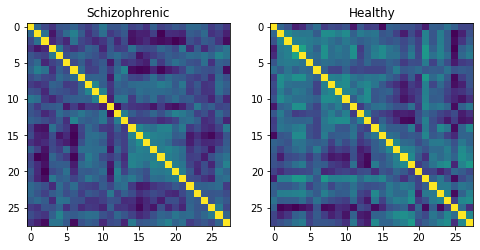

In [14]:
labels_str = ["Healthy", "Schizophrenic"]

fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(121)
imgplot = ax.imshow(data[0]); ax.set_title(labels_str[labels[0]])

ax = fig.add_subplot(122)
imgplot = ax.imshow(data[1]); ax.set_title(labels_str[labels[1]])

plt.show()

We verify that the connectomes in `data` belong to the manifold of SPD matrices.

In [21]:
from geomstats.geometry.spd_matrices import SPDMatrices

spd_manifold = SPDMatrices(n=28)
spd_manifold.belongs(data)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## Classification Method 1: Tangent Machine Learning

### Recall: "Trick": Tangent Space at the Fréchet Mean

The Fréchet mean gives us a way of transforming our non-linear data into vectors!
- Compute the Fréchet mean $\bar{x}$ of the data points
- Consider the tangent space $T_\bar{x}M$of the manifold $M$ at $\bar{x}$
- Compute the Logarithms of the data points $x_i$ at $\bar{x}$

$\rightarrow$ Get a dataset on a vector space, and apply classical machine learning on it.

$\rightarrow$ This is done using `ToTangentSpace`: which automatically computes the `FrechetMean` and project the data on the corresponding tangent space. We can then use any machine learning's classification algorithm available in `scikit-learn`.

$\color{#047C91}{\text{Example}}$: Use "logistic regression", which is a classifier.

In [31]:
from geomstats.learning.preprocessing import ToTangentSpace
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline(
    steps=[
        ("trick_tangent_space", ToTangentSpace(geometry=spd_manifold.metric)),
        ("classifier", LogisticRegression(C=2)),
    ]
)

We classify connectomes, and we evaluate the model with cross validation. 

In [37]:
from sklearn.model_selection import train_test_split


X = data; y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [43]:
lr_pipeline.fit(X_train, y_train)

We get an accuracy of 0.73.


We compute its accuracy on a test set.

In [ ]:
print(f"We get an accuracy of {lr_pipeline.score(X_test, y_test):.2f}.")

We can use it to make new predictions.

In [48]:
[labels_str[i] for i in lr_pipeline.predict(X_test[:2])]

['Healthy', 'Schizophrenic']

$\color{#047C91}{\text{Example}}$: Use "SVC" which stands for Support Vector Classifier, which is another classifier.

In [50]:
from sklearn.svm import SVC

svc_pipeline = Pipeline(
    steps=[
        ("trick_tangent_space", ToTangentSpace(geometry=spd_manifold.metric)),
        ("classifier", SVC(C=1.)),
    ]
)

In [51]:
svc_pipeline.fit(X_train, y_train)

print(f"We get an accuracy of {svc_pipeline.score(X_test, y_test):.2f}.")

We get an accuracy of 0.55.


## Classification Method 2: Minimum Distance to Mean

- Training: Compute the mean of each class
- Testing: Give label of the class whose mean is the closest to the new data point.

$\color{#047C91}{\text{Exercise}}$: What is the tool we need to be able to apply this method?

<center><img src="figs/03_mdm.png" width=400px alt="default"/></center>




In [56]:
from geomstats.learning.mdm import RiemannianMinimumDistanceToMeanClassifier

mdm = RiemannianMinimumDistanceToMeanClassifier(riemannian_metric=spd_manifold.metric, n_classes=2)

mdm.fit(X_train, y_train)

In [58]:
mdm.predict(X_test)
mdm.score(X_test, y_test)

0.8181818181818182

# This Unit

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
- **Unit 2 (Shapes)**: Computational Representations of Biomedical Shapes
- **Unit 3 (Machine Learning)**: **Geometric Machine Learning for Shape Analysis**
  - A) Mean and Covariance
  - **B) Supervised Learning: Classification**
    - Motivation: Classification of Schizophrenia
    - Tangent Machine Learning: Tangent Classifications
    - Metric Machine Learning: Minimum distance to mean
  - C) Supervised Learning: Regression
  - D) Unsupervised Learning: Clustering
  - E) Unsupervised Learning: Dimension Reduction
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

$\rightarrow$ We explain the machine learning algorithms and statistics used in these real-world scenarios.

<center><img src="figs/00_bioshape.jpg" width=350px alt="default"/></center>
